2025-01-05 05:48:29.384311: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-05 05:48:33.529613: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-05 05:48:33.541358: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-05 05:48:33.541421: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUM

Training ReLU model...
Epoch 1/10


I0000 00:00:1736052516.006048    7226 service.cc:145] XLA service 0x7f2d040043c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736052516.006110    7226 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 with Max-Q Design, Compute Capability 7.5
2025-01-05 05:48:36.038285: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-05 05:48:36.178231: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8901


 48/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5223 - loss: 1.6382

I0000 00:00:1736052517.120707    7226 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8160 - loss: 0.6540 - val_accuracy: 0.9585 - val_loss: 0.1534
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9553 - loss: 0.1508 - val_accuracy: 0.9707 - val_loss: 0.1060
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1036 - val_accuracy: 0.9738 - val_loss: 0.1003
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9775 - loss: 0.0743 - val_accuracy: 0.9747 - val_loss: 0.0931
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9825 - loss: 0.0598 - val_accuracy: 0.9750 - val_loss: 0.0824
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9861 - loss: 0.0469 - val_accuracy: 0.9782 - val_loss: 0.0779
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0395 - val_accuracy: 0.9787 - val_loss: 0.0746
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0319 - val_accuracy: 0.9792 - val_

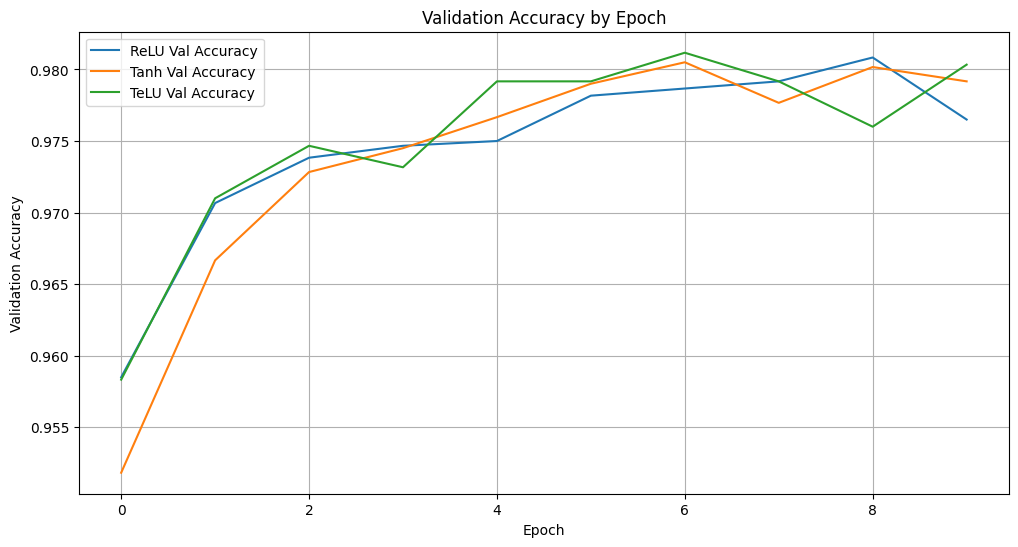

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Define the TeLU activation function
class TeLU(layers.Layer):
    def __init__(self, **kwargs):
        super(TeLU, self).__init__(**kwargs)

    def call(self, inputs):
        return inputs * tf.tanh(tf.exp(inputs))

# Function to build a simple model
def build_model(activation):
    return models.Sequential([
        layers.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(128),
        activation,
        layers.Dense(64),
        activation,
        layers.Dense(10, activation='softmax')  # Output layer
    ])

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define activation functions
relu_model = build_model(layers.Activation('relu'))
tanh_model = build_model(layers.Activation('tanh'))
telu_model = build_model(TeLU())

# Compile models
models_to_train = {
    "ReLU": relu_model,
    "Tanh": tanh_model,
    "TeLU": telu_model
}
for name, model in models_to_train.items():
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train models
histories = {}
for name, model in models_to_train.items():
    print(f"Training {name} model...")
    histories[name] = model.fit(x_train, y_train, 
                                validation_split=0.1, 
                                epochs=10, 
                                batch_size=128, 
                                verbose=1)

# Evaluate models
results = {}
for name, model in models_to_train.items():
    print(f"Evaluating {name} model...")
    results[name] = model.evaluate(x_test, y_test, verbose=0)

# Print results
for name, result in results.items():
    print(f"{name} Test Accuracy: {result[1] * 100:.2f}%")

# Plot training histories
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} Val Accuracy')
plt.title('Validation Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()
